In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

from tensorflow.keras.models import load_model

In [ ]:
model_path='/content/drive/MyDrive/models/custom5layer.h5'
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
model=reload_model

In [ ]:
model.layers

## Testing a random image

In [ ]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[0.9999995]]
0


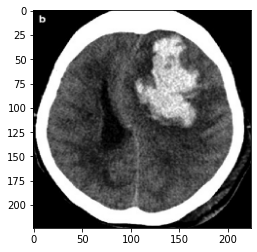

In [ ]:
random_image=image.load_img('/content/drive/MyDrive/Dataset_200/Original Dataset/hemorrhage/yes/000.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

## Convolution Filter Visualization: 
- Convolution 3x3

In [ ]:
layer=model.layers
layer

## Convolution: 0

In [ ]:
filters,biases=model.layers[0].get_weights()
print(layer[0].name,filters.shape)

conv2d (3, 3, 3, 32)


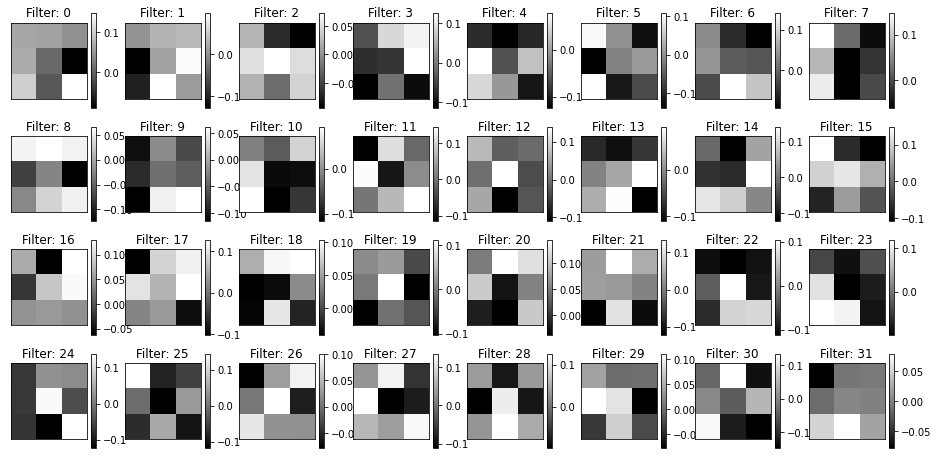

In [ ]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0],cmap='gray')
    plt.colorbar()
plt.show()  

## Convolution: 1

In [ ]:
filters_1,biases_1=model.layers[2].get_weights()
print(layer[2].name,filters_1.shape)

conv2d_1 (3, 3, 32, 32)


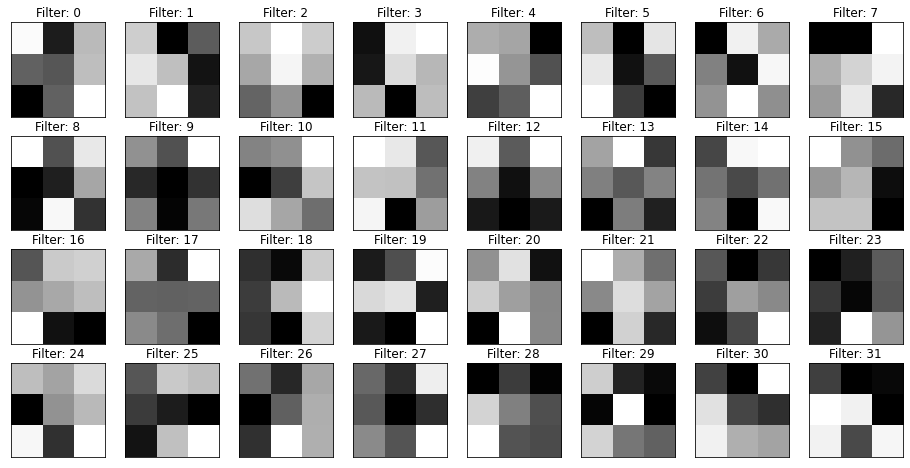

In [ ]:
fig=plt.figure(figsize=(16, 8))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1,n_filters+1):
    fig.add_subplot(rows, columns, i)
    f = filters_1[:, :, :, i-1]
    plt.xticks([]) 
    plt.yticks([])
    plt.title('Filter: '+str(i-1))
    plt.imshow(f[:, :, 0],cmap='gray')
plt.show()  

## Layers Visualization

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'flatten', 'dense', 'dropout', 'dense_1', 'dropout_1', 'dense_2', 'dropout_2', 'dense_3']


In [ ]:
model_layers

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4',
 'flatten',
 'dense',
 'dropout',
 'dense_1',
 'dropout_1',
 'dense_2',
 'dropout_2',
 'dense_3']

In [ ]:
from tensorflow.keras.models import Model

## Convolutional Layers Implementation

In [ ]:
conv2d_output=Model(inputs=model.input,outputs=model.get_layer('conv2d').output)
conv2d_1_output=Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
conv2d_2_output=Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
conv2d_3_output=Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)
conv2d_4_output=Model(inputs=model.input,outputs=model.get_layer('conv2d_4').output)

In [ ]:
conv2d_features=conv2d_output.predict(test_image)
conv2d_1_features=conv2d_1_output.predict(test_image)
conv2d_2_features=conv2d_2_output.predict(test_image)
conv2d_3_features=conv2d_3_output.predict(test_image)
conv2d_4_features=conv2d_4_output.predict(test_image)
print('Conv layer feature output shape: ',conv2d_features.shape)
print('Conv_1 layer feature output shape: ',conv2d_1_features.shape)
print('Conv_2 layer feature output shape: ',conv2d_2_features.shape)
print('Conv_3 layer feature output shape: ',conv2d_3_features.shape)
print('Conv_4 layer feature output shape: ',conv2d_4_features.shape)

Conv layer feature output shape:  (1, 222, 222, 32)
Conv_1 layer feature output shape:  (1, 109, 109, 32)
Conv_2 layer feature output shape:  (1, 52, 52, 64)
Conv_3 layer feature output shape:  (1, 24, 24, 64)
Conv_4 layer feature output shape:  (1, 10, 10, 128)


## Maxpooling Layers Implementation

In [ ]:
max_pooling_2d_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
max_pooling_2d_1_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
max_pooling_2d_2_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
max_pooling_2d_3_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
max_pooling_2d_4_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_4').output)

In [ ]:
maxpool2d_features=max_pooling_2d_output.predict(test_image)
maxpool2d_1_features=max_pooling_2d_1_output.predict(test_image)
maxpool2d_2_features=max_pooling_2d_2_output.predict(test_image)
maxpool2d_3_features=max_pooling_2d_3_output.predict(test_image)
maxpool2d_4_features=max_pooling_2d_4_output.predict(test_image)
print('Conv layer feature output shape: ',maxpool2d_features.shape)
print('Conv_1 layer feature output shape: ',maxpool2d_1_features.shape)
print('Conv_2 layer feature output shape: ',maxpool2d_2_features.shape)
print('Conv_3 layer feature output shape: ',maxpool2d_3_features.shape)
print('Conv_4 layer feature output shape: ',maxpool2d_4_features.shape)

Conv layer feature output shape:  (1, 111, 111, 32)
Conv_1 layer feature output shape:  (1, 54, 54, 32)
Conv_2 layer feature output shape:  (1, 26, 26, 64)
Conv_3 layer feature output shape:  (1, 12, 12, 64)
Conv_4 layer feature output shape:  (1, 5, 5, 128)


## Dense Layer Implementation

In [ ]:
dense_output=Model(inputs=model.input,outputs=model.get_layer('dense').output)
dense_1_output=Model(inputs=model.input,outputs=model.get_layer('dense_1').output)
dense_2_output=Model(inputs=model.input,outputs=model.get_layer('dense_2').output)
dense_3_output=Model(inputs=model.input,outputs=model.get_layer('dense_3').output)

In [ ]:
dense_features=dense_output.predict(test_image)
dense_1_features=dense_1_output.predict(test_image)
dense_2_features=dense_2_output.predict(test_image)
dense_3_features=dense_3_output.predict(test_image)
print('Dense layer feature output shape: ',dense_features.shape)
print('Dense_1 layer feature output shape: ',dense_1_features.shape)
print('Dense_2 layer feature output shape: ',dense_2_features.shape)
print('Dense_3 layer feature output shape: ',dense_3_features.shape)

Dense layer feature output shape:  (1, 64)
Dense_1 layer feature output shape:  (1, 128)
Dense_2 layer feature output shape:  (1, 256)
Dense_3 layer feature output shape:  (1, 1)


## Convolution: 0

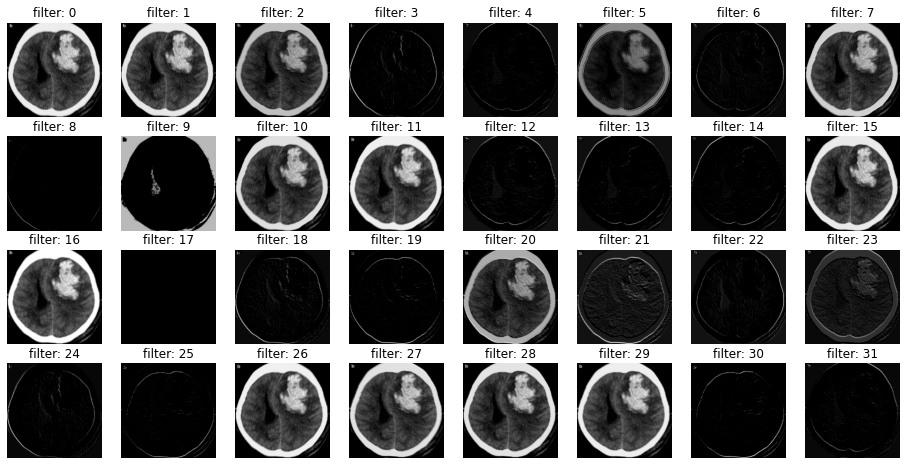

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_features[0, :, :, i],cmap='gray')
plt.show()

## Maxpooling2D: 0

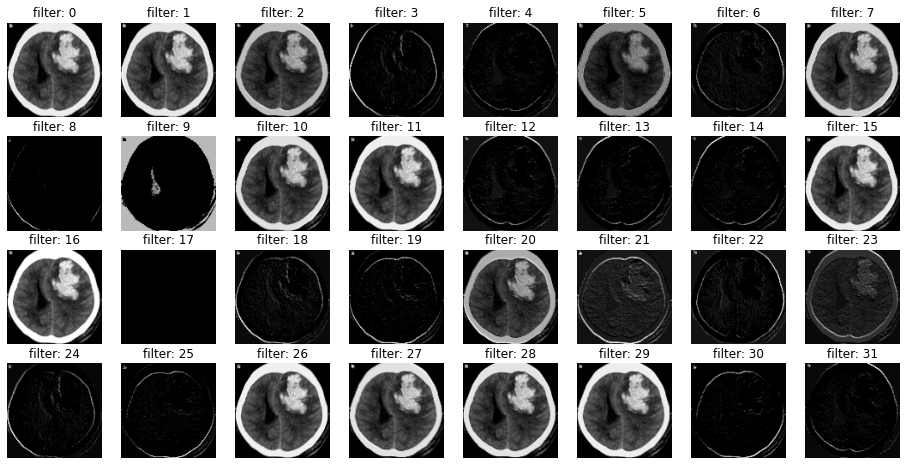

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 1

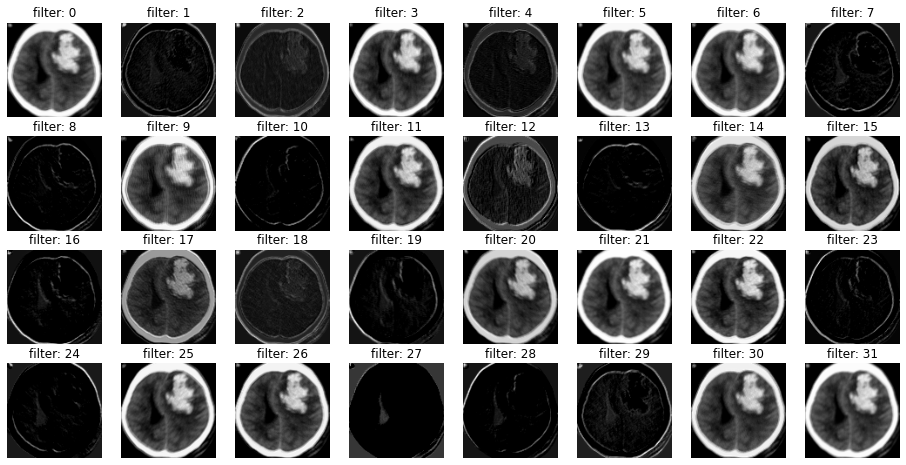

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_1_features[0, :, :, i],cmap='gray')
plt.show()

## Maxpooling2D: 1

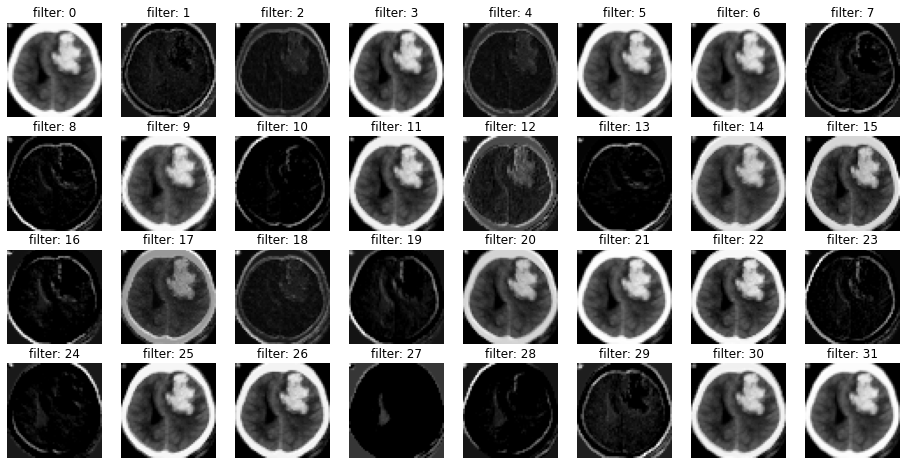

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_1_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 2

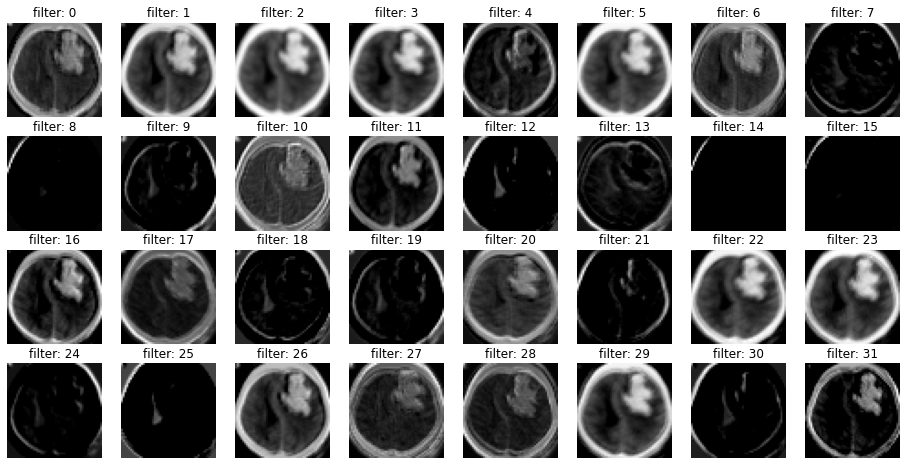

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_2_features[0, :, :, i],cmap='gray')
plt.show()

## Maxpooling2D : 2

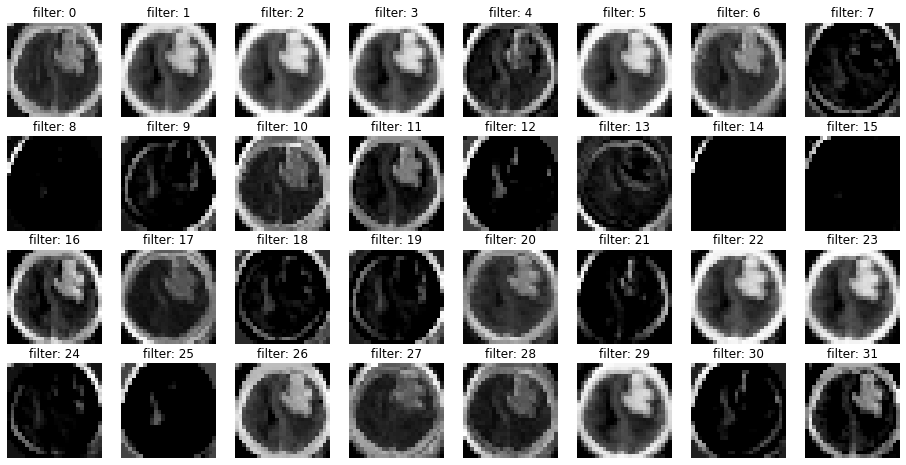

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_2_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 3

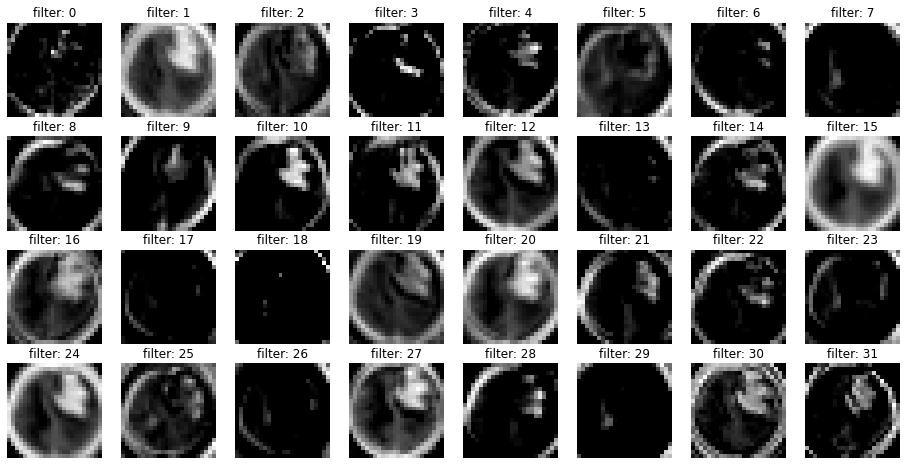

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_3_features[0, :, :, i],cmap='gray')
plt.show()

## Maxpooling 2D: 3

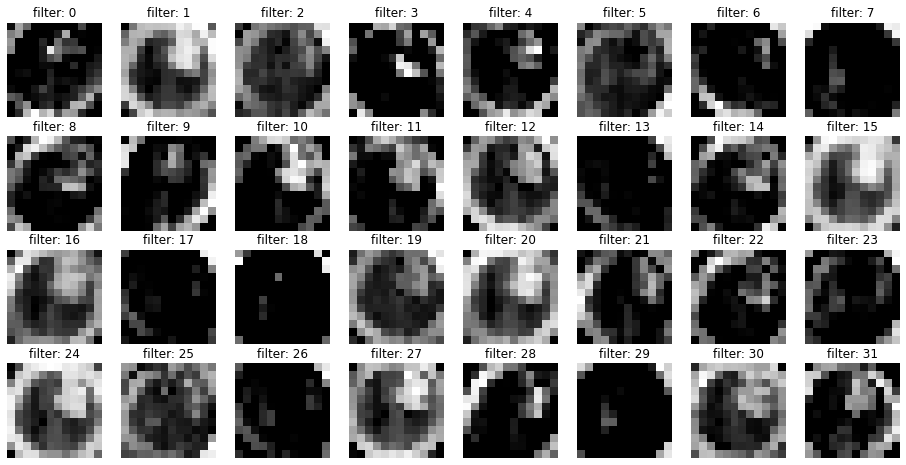

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_3_features[0, :, :, i],cmap='gray')
plt.show()

## Convolution: 4

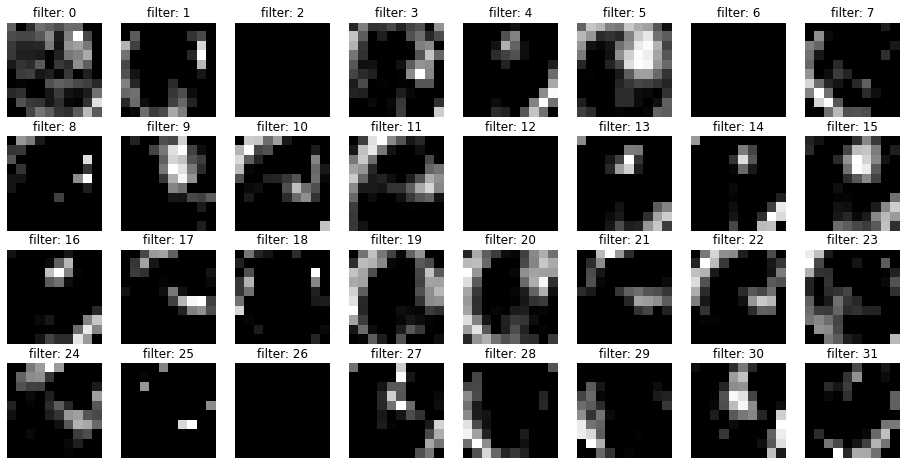

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_4_features[0, :, :, i],cmap='gray')
plt.show()

## Maxpooling 2D: 4

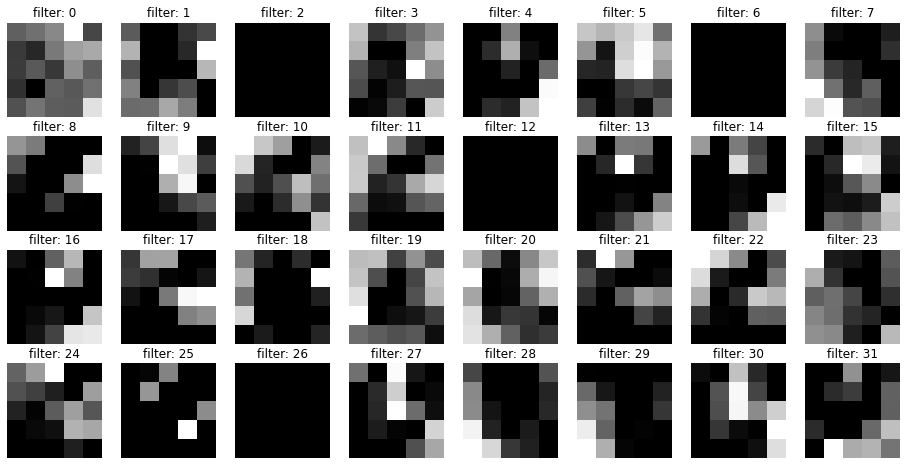

In [ ]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(maxpool2d_4_features[0, :, :, i],cmap='gray')
plt.show()